In [19]:
import pandas as pd  
import numpy as np
from glob import glob
from scipy.io import savemat, loadmat
from datetime import datetime, timedelta

import seaborn as sns
sns.reset_orig()
import matplotlib.pyplot as plt
import pdb

import psycopg2
import sqlite3
import os

from importlib import reload

from scipy.interpolate import interp1d

import visualizeProfs as vp
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pchipOceanSlices import PchipOceanSlices

/home/tyler/anaconda3/envs/argo/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/tyler/anaconda3/envs/argo/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/tyler/anaconda3/envs/argo/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/tyler/anaconda3/envs/argo/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/tyler/anaconda3/envs/argo/lib/python3.6/_collectio

In [7]:
outlierProfs = ['5901722_1   ',
    '6901633_102 ',
    '6901644_1   ',
    '6901697_1   ',
    '6901701_1   ',
    '6901699_1   ',
    '6901636_42  ',
    '5903510_4   ',
    '6901599_1   ',
    '6901502_1   ',
    '6901458_1   ',
    '6901542_1   ',
    '6901544_1   ',
    '6901459_1   ',
    '5901466_50  ',
    '3900803_56  ',
    '3900781_105 ',
    '5901459_115 ',
    '6902682_34  ',
    '6902682_33  ',
    '6902682_41  ',
    '6902682_42  ',
    '6902682_37  ',
    '3901034_75  ',
    '6902682_31  ',
    '3900673_60  ',
    '5901462_114 ',
    '3900741_196 ']

profiles = vp.get_profiles_by_id(str(outlierProfs).replace(' ', ''))
if len(profiles) > 0:
    selectionDf = vp.parse_into_df(profiles)
selectionDf.replace(-999, np.nan, inplace=True)

In [8]:
selectionDf.head()

,temp,pres,psal,cycle_number,profile_id,lat,lon,date,position_qc,date_qc
0,28.738,1.0,34.970,42.0,6902682_42,0.144,-9.406,2017-01-31T06:40:00.000Z,1.0,1.0
1,28.738,2.0,34.975,42.0,6902682_42,0.144,-9.406,2017-01-31T06:40:00.000Z,1.0,1.0
2,28.747,5.0,34.973,42.0,6902682_42,0.144,-9.406,2017-01-31T06:40:00.000Z,1.0,1.0
3,28.751,6.0,34.974,42.0,6902682_42,0.144,-9.406,2017-01-31T06:40:00.000Z,1.0,1.0
4,28.751,8.0,34.975,42.0,6902682_42,0.144,-9.406,2017-01-31T06:40:00.000Z,1.0,1.0


In [14]:
ciCol = 'temp'
xLab = 'pres'
yLab = ciCol
pLevel = 10
xintp = pLevel
pLevelRange = [pLevel,pLevel+10]
pos = PchipOceanSlices(pLevelRange)
iDf = pos.make_interpolated_df(profiles, xintp, xLab, yLab)
iDf.date = pd.to_datetime(iDf.date)


In [25]:
f = interp1d(df.pres, df.temp, kind='linear')
yLinear = f(pLevel)
print(yLinear)
iX

28.75


array(28.75)

/home/tyler/anaconda3/envs/argo/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


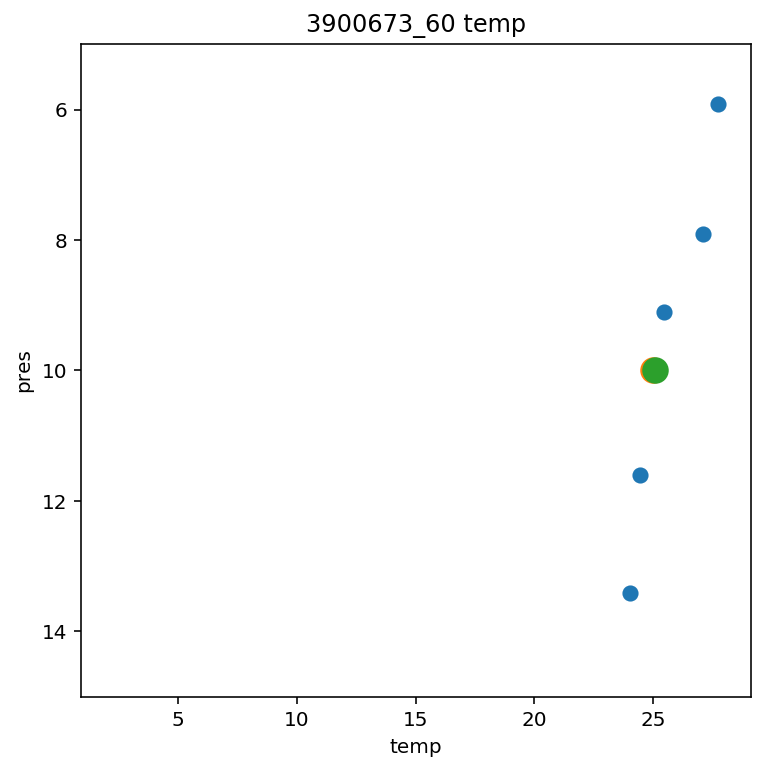

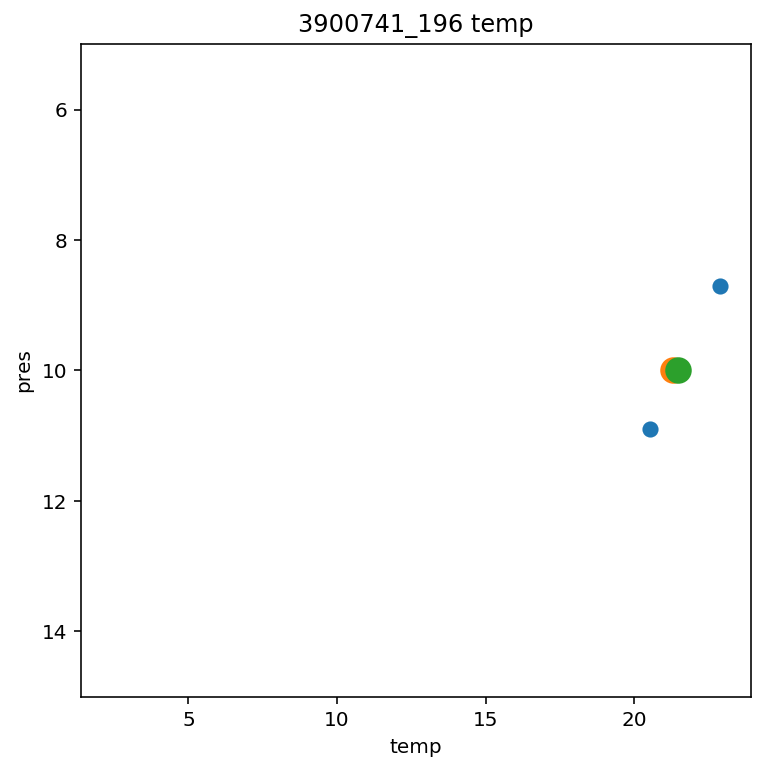

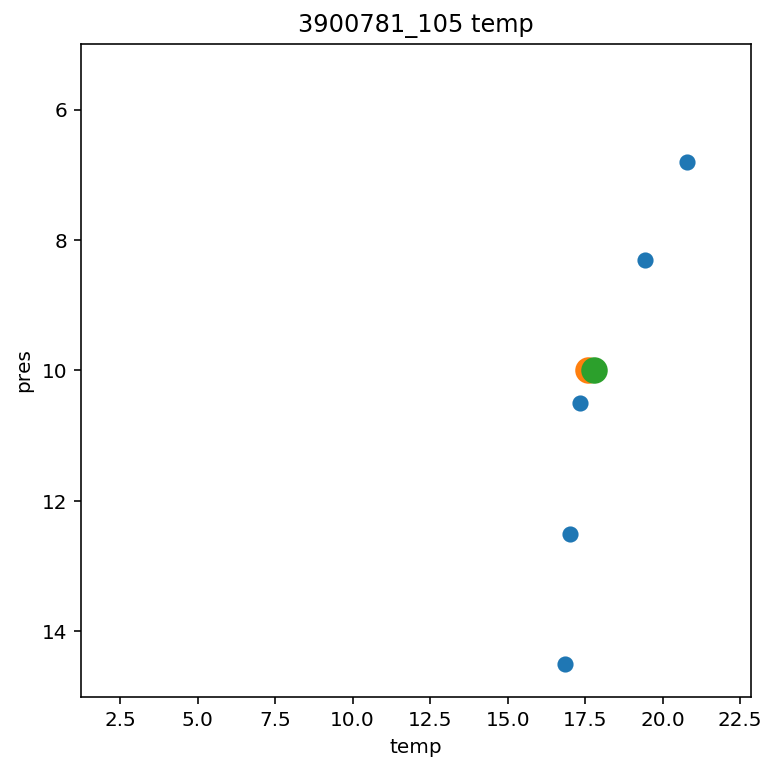

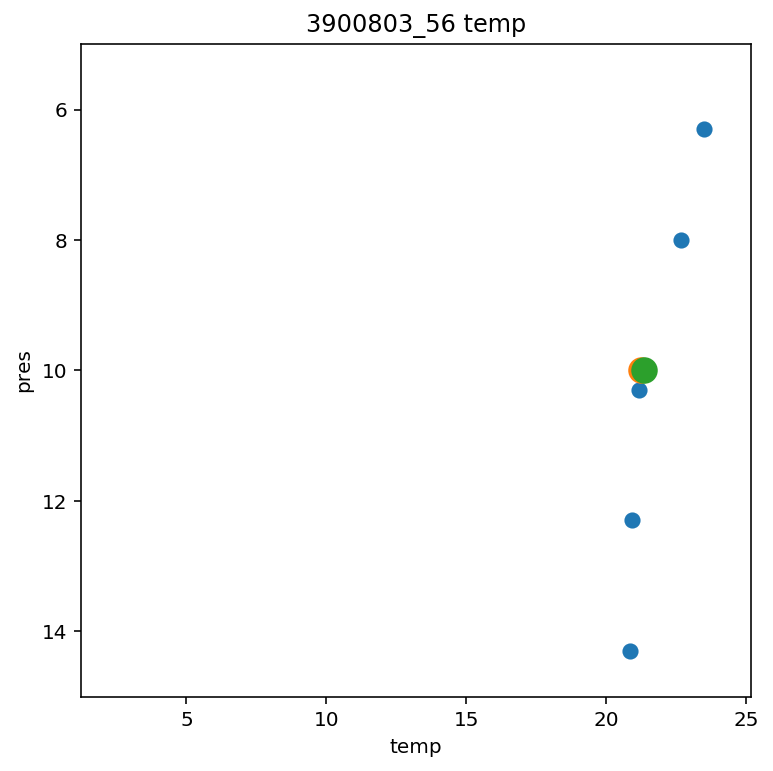

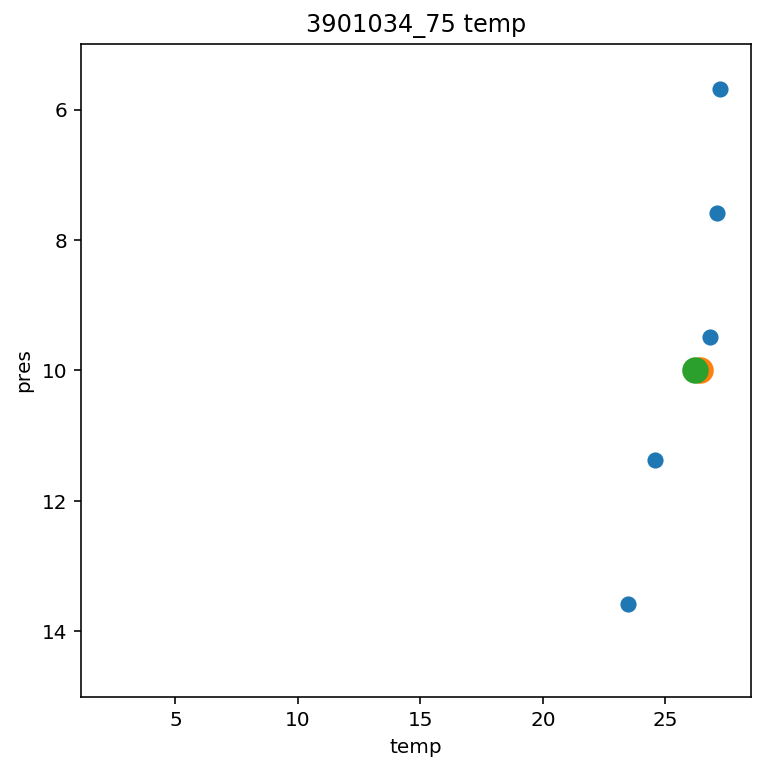

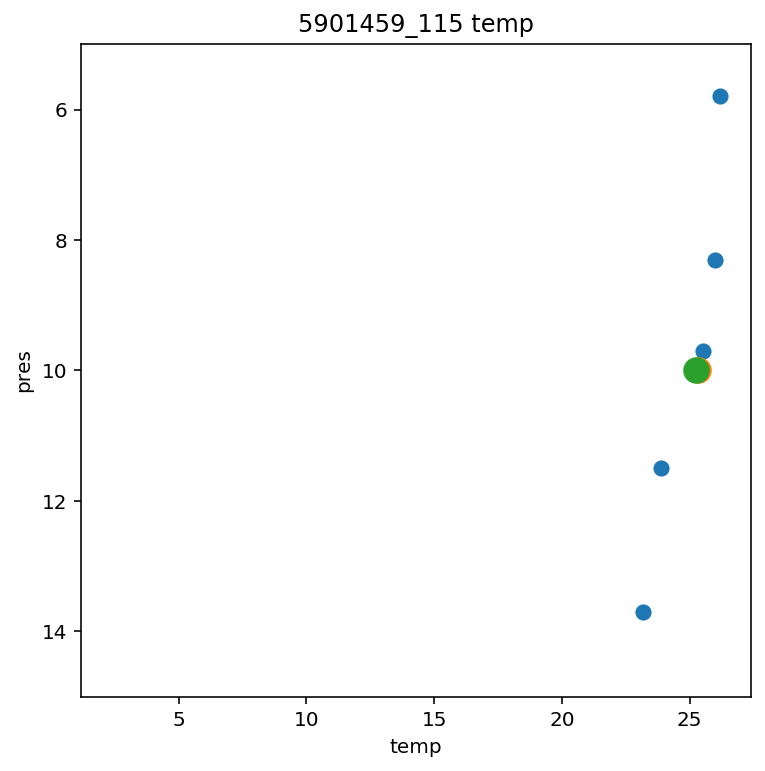

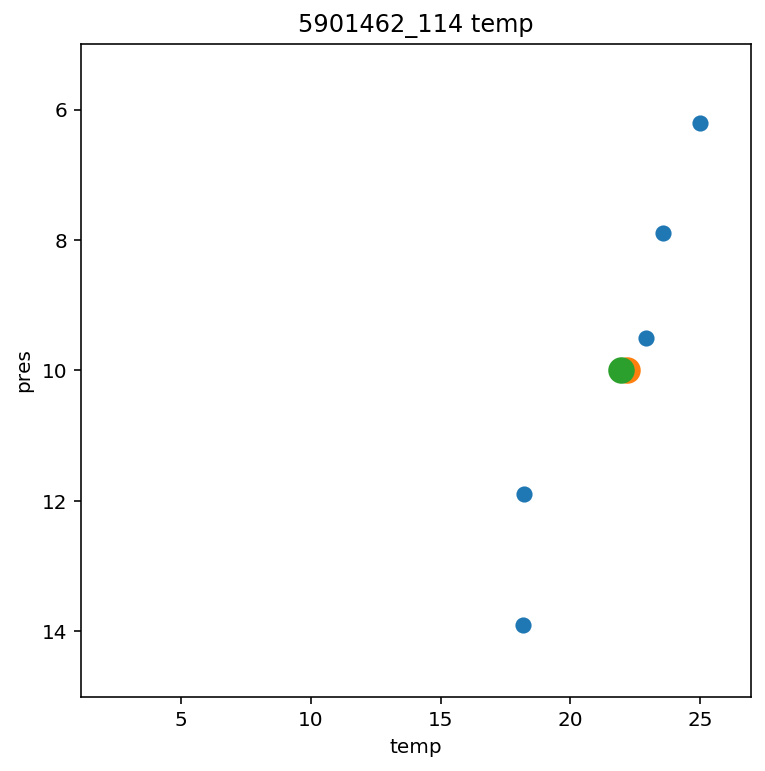

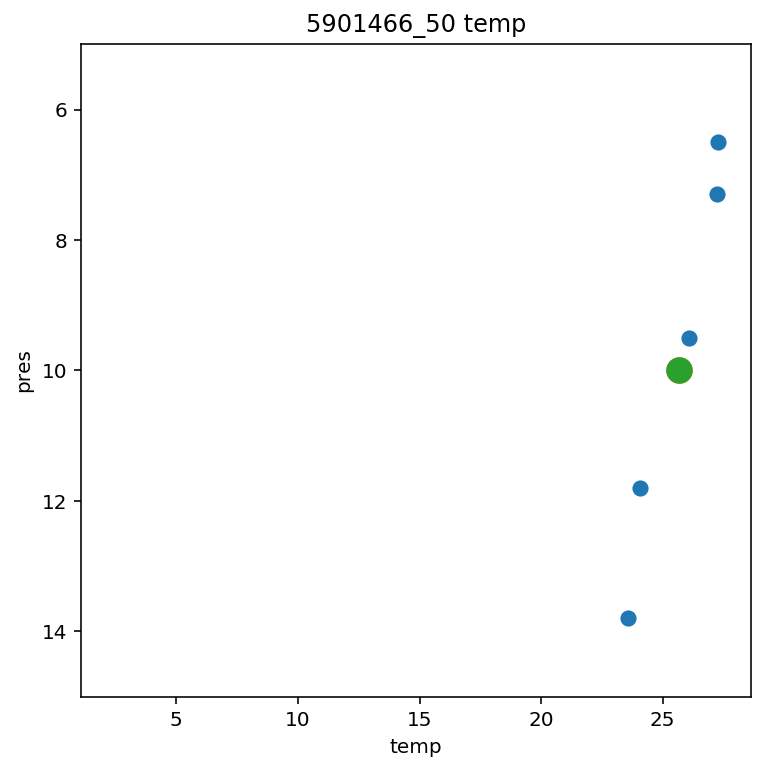

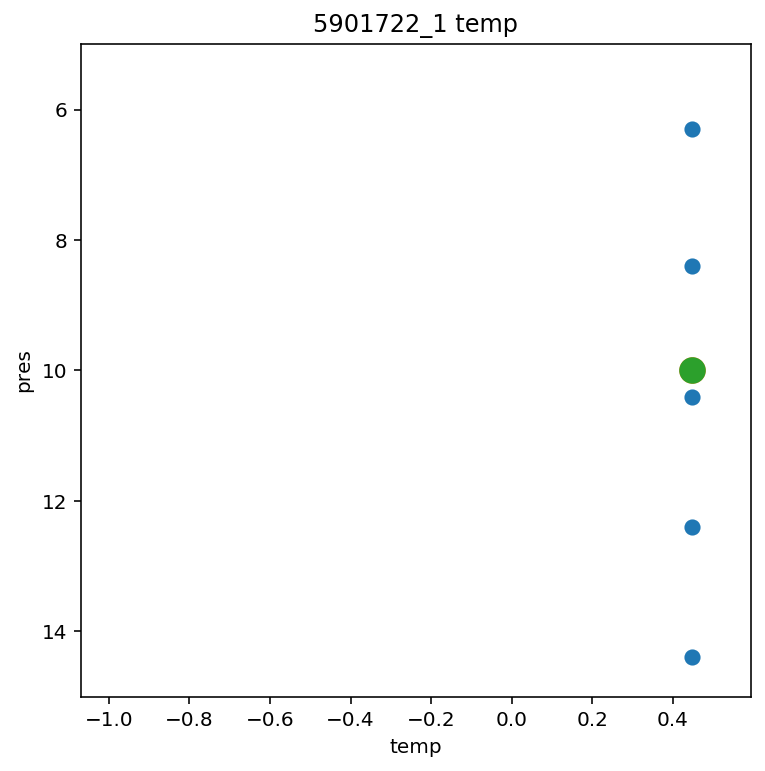

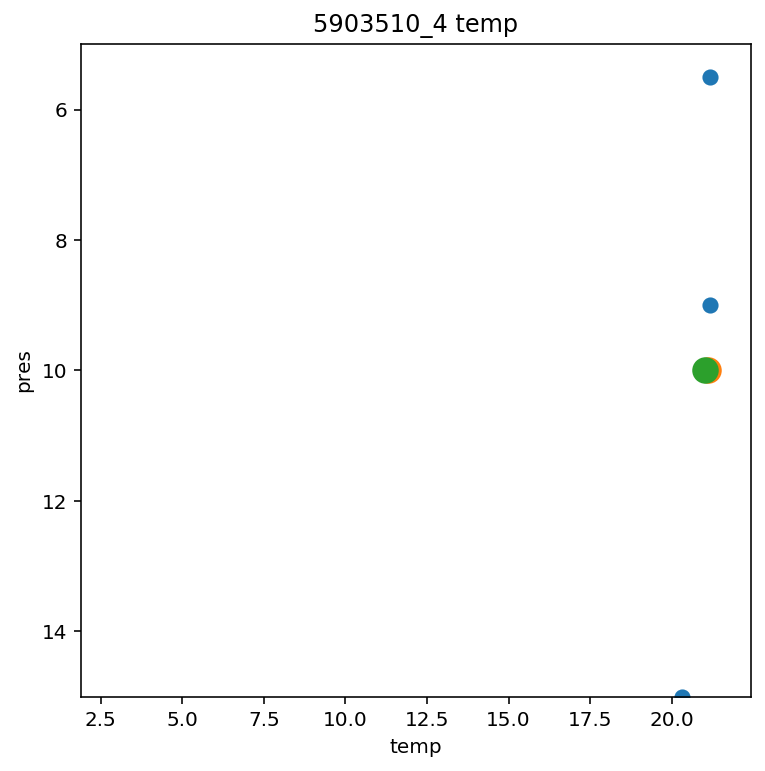

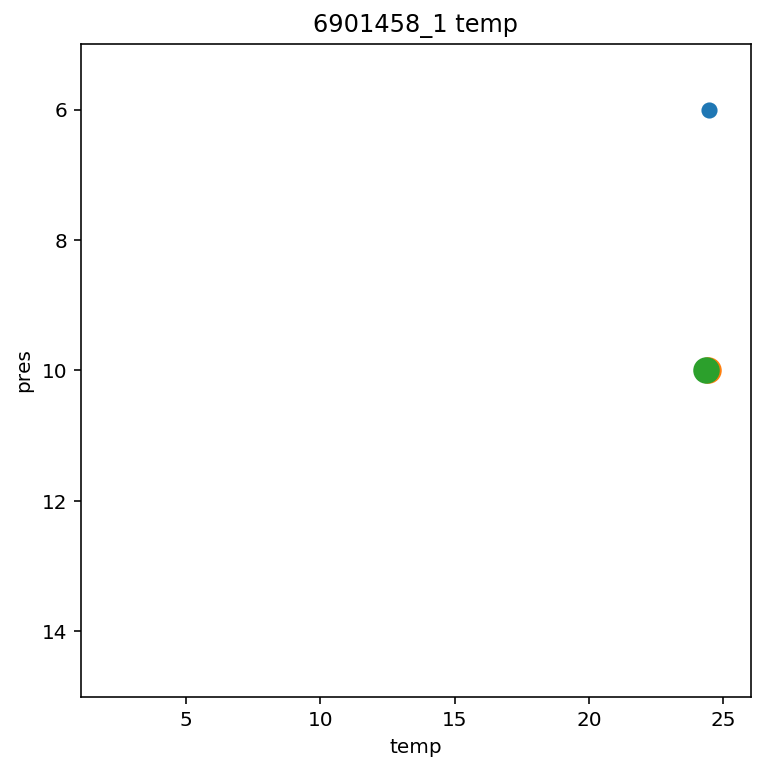

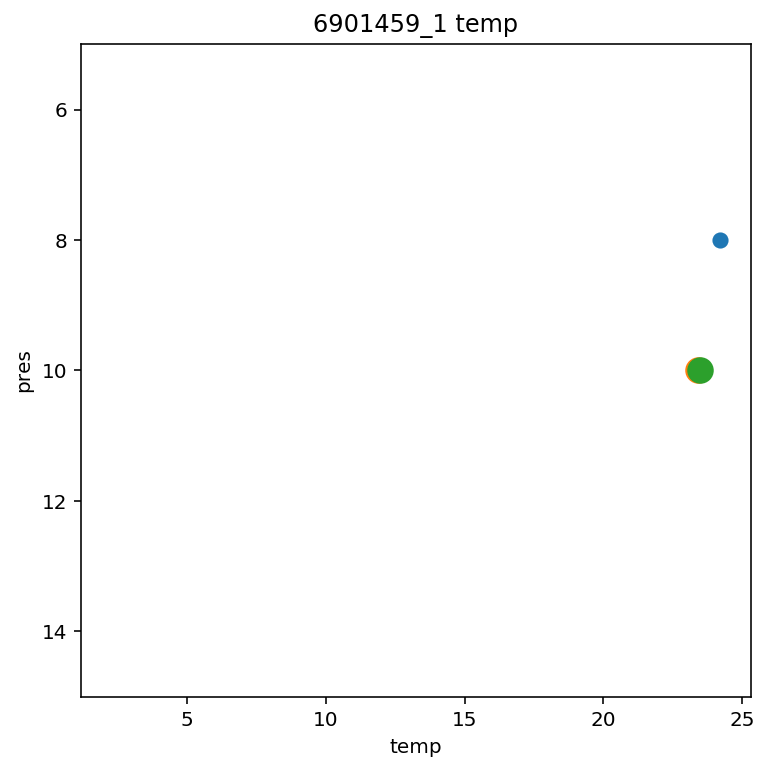

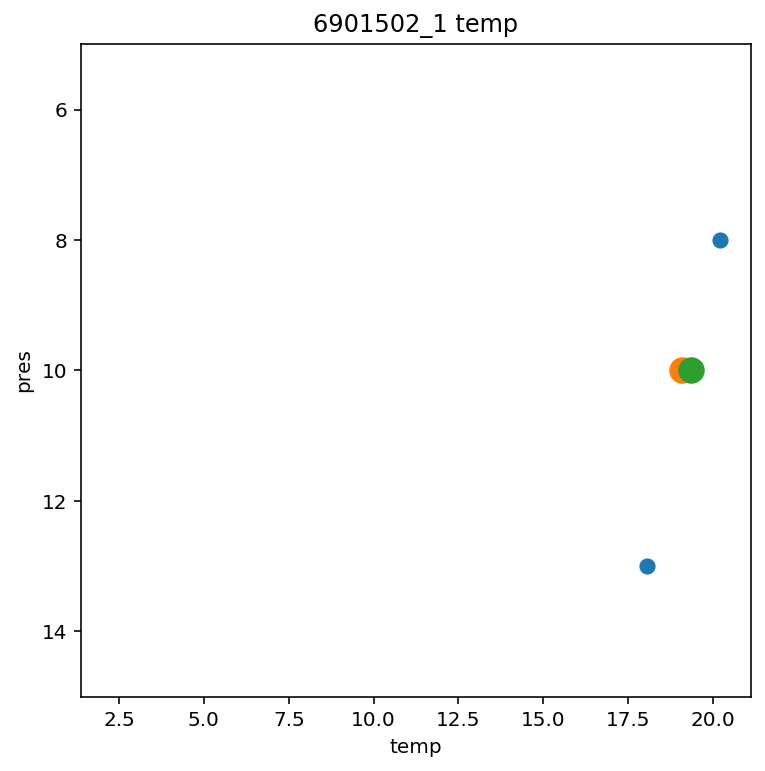

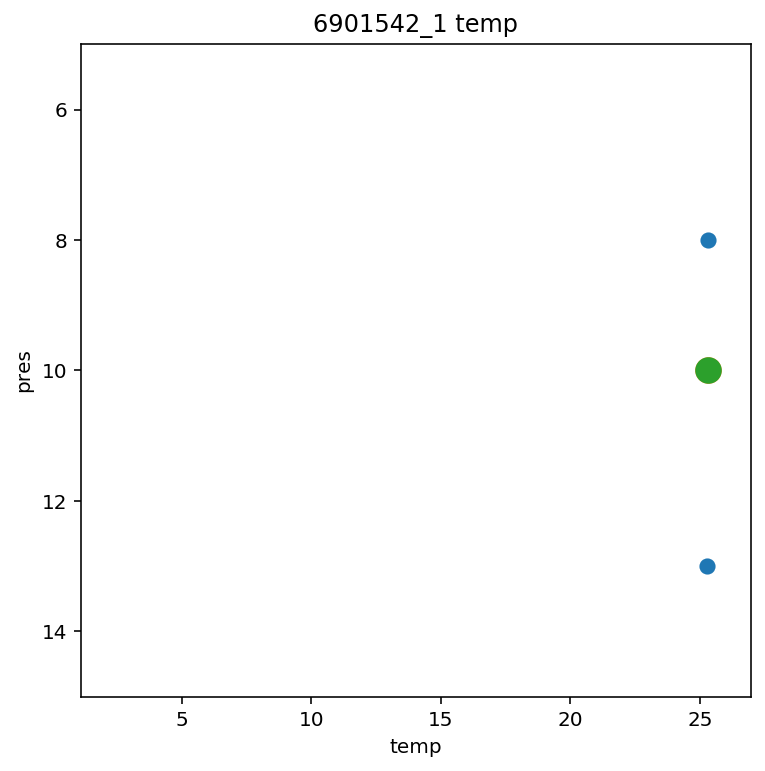

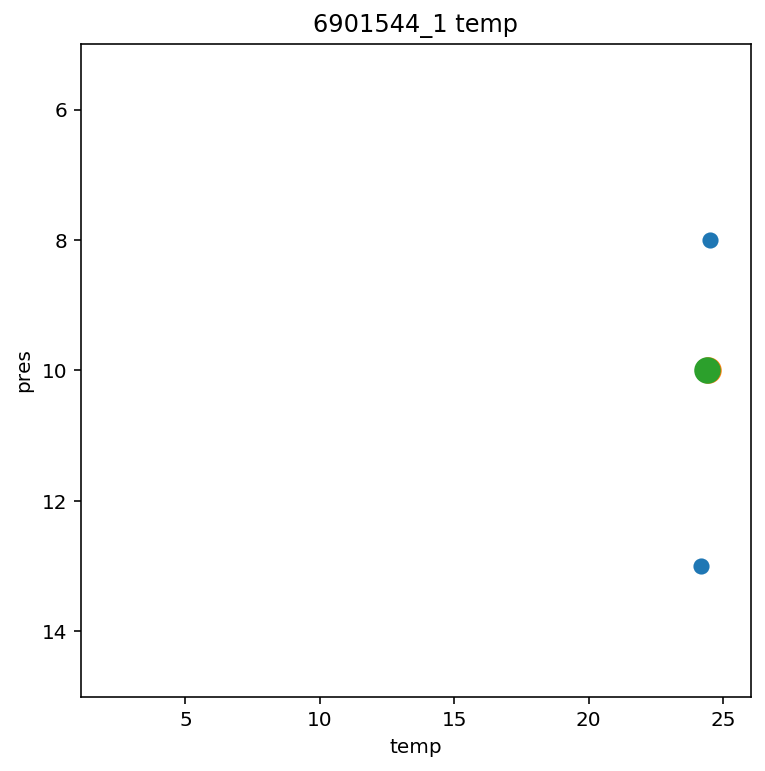

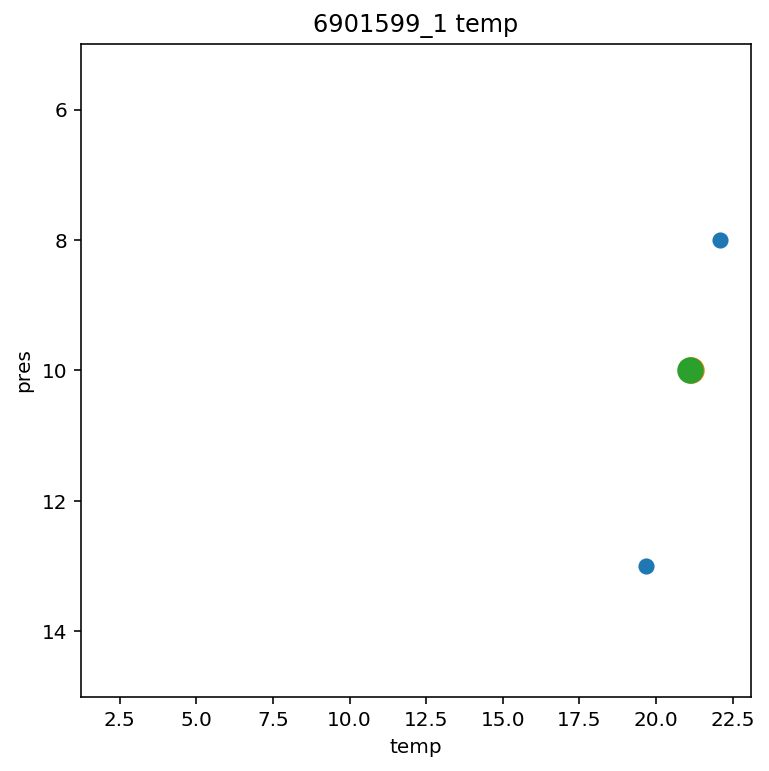

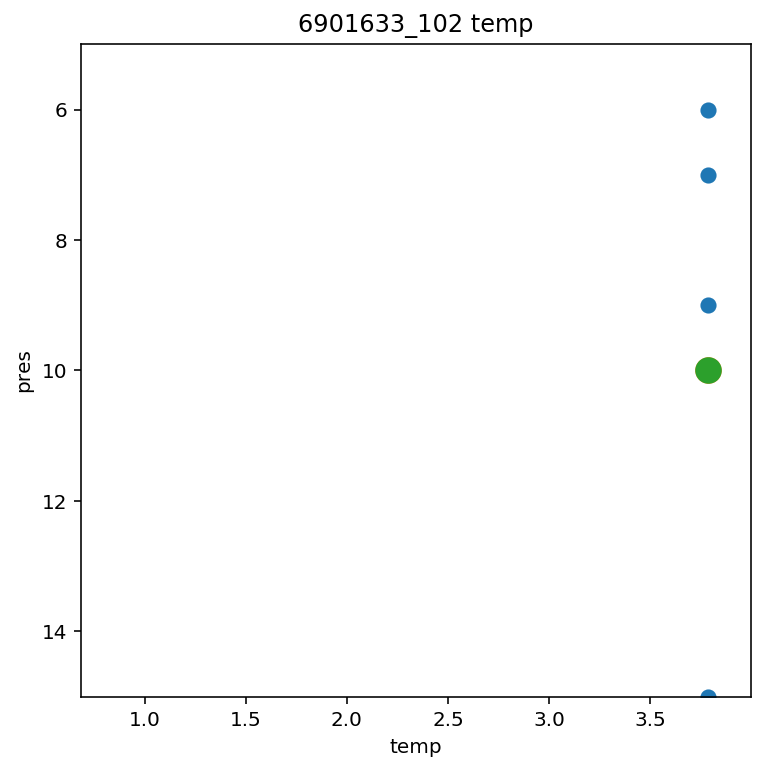

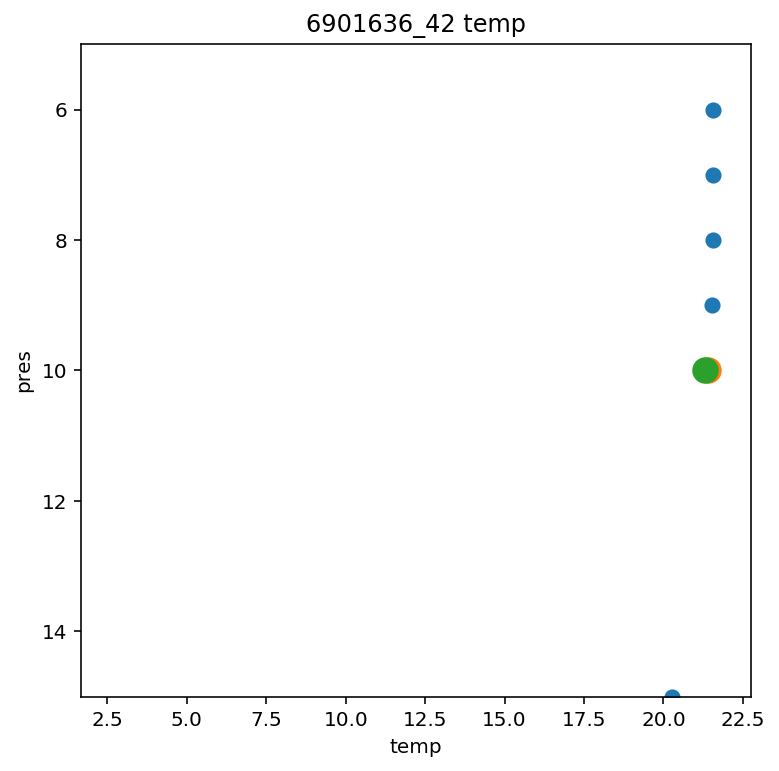

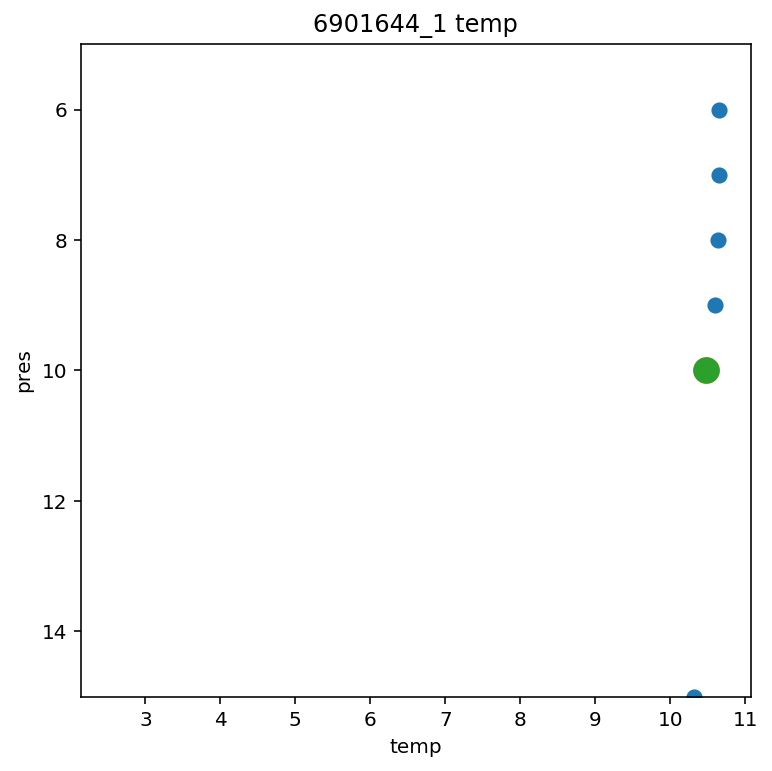

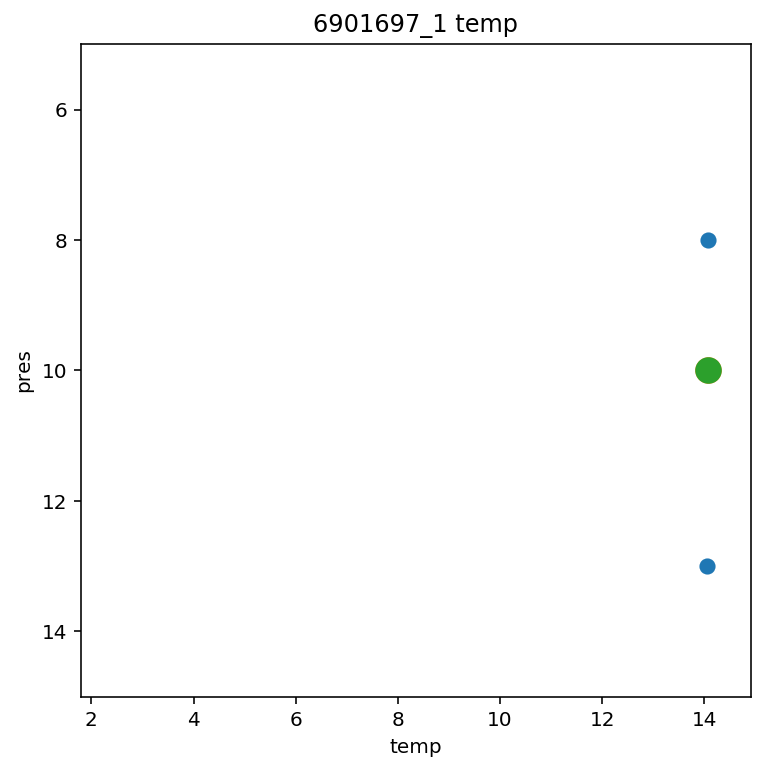

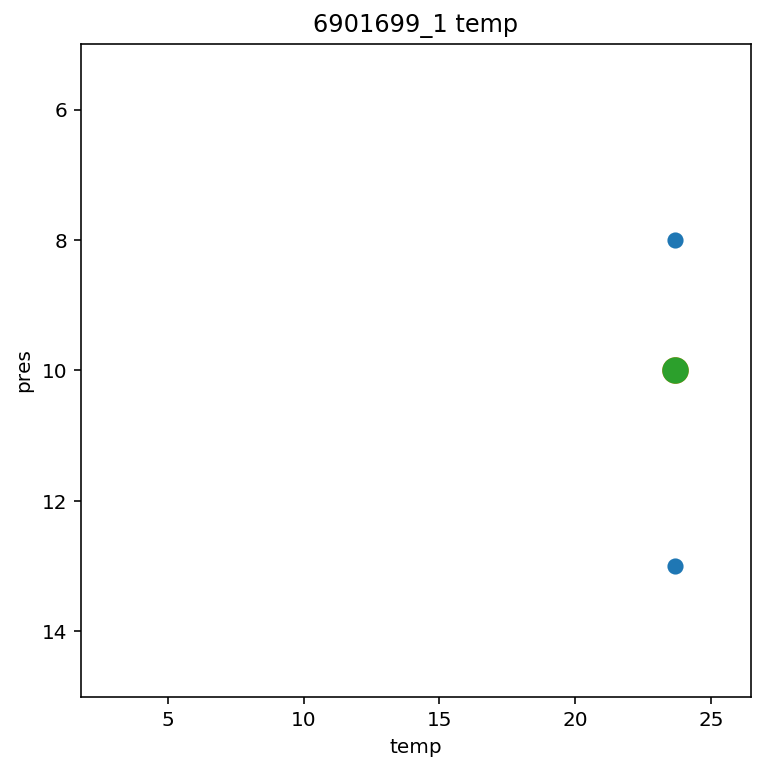

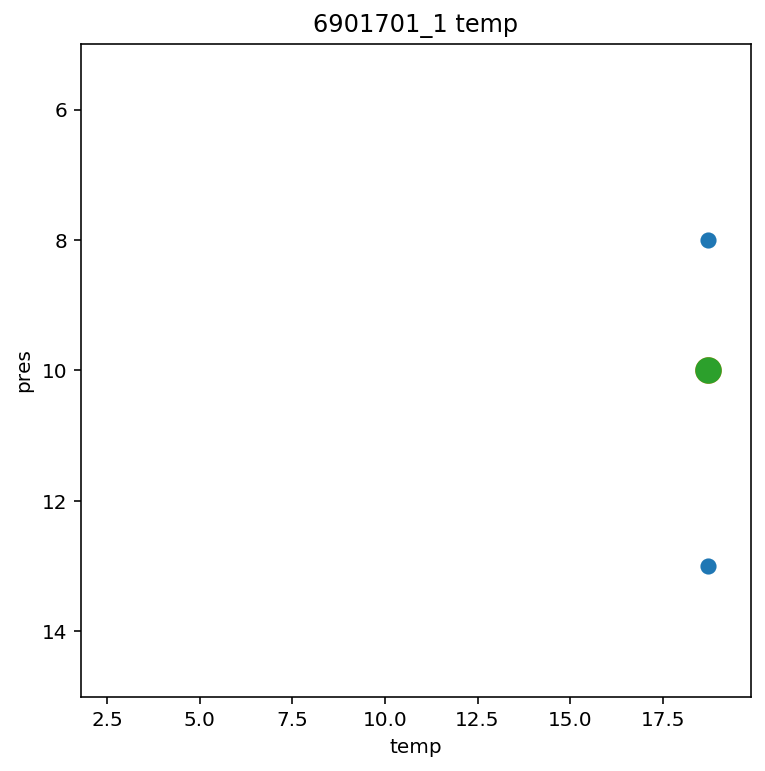

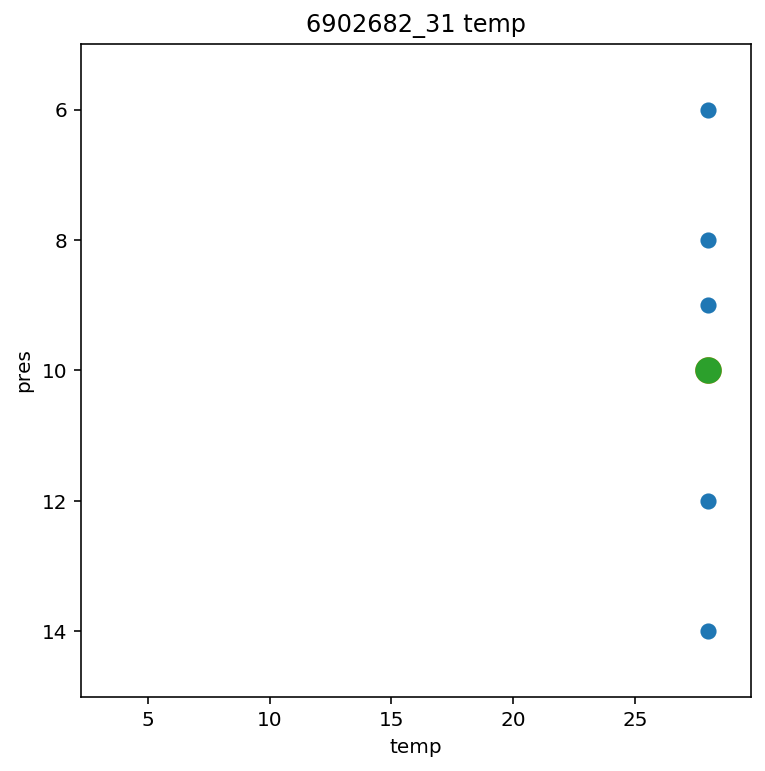

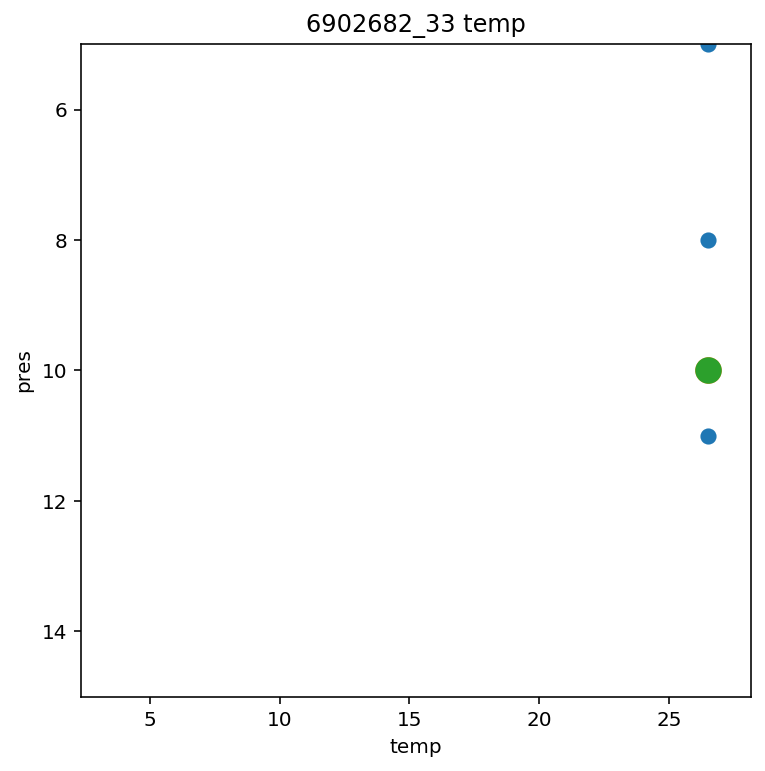

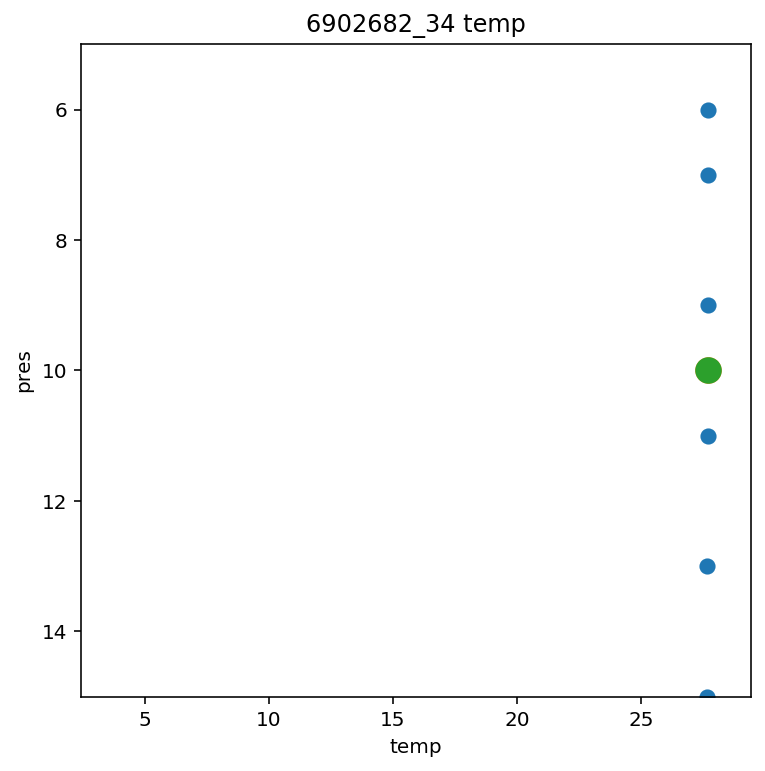

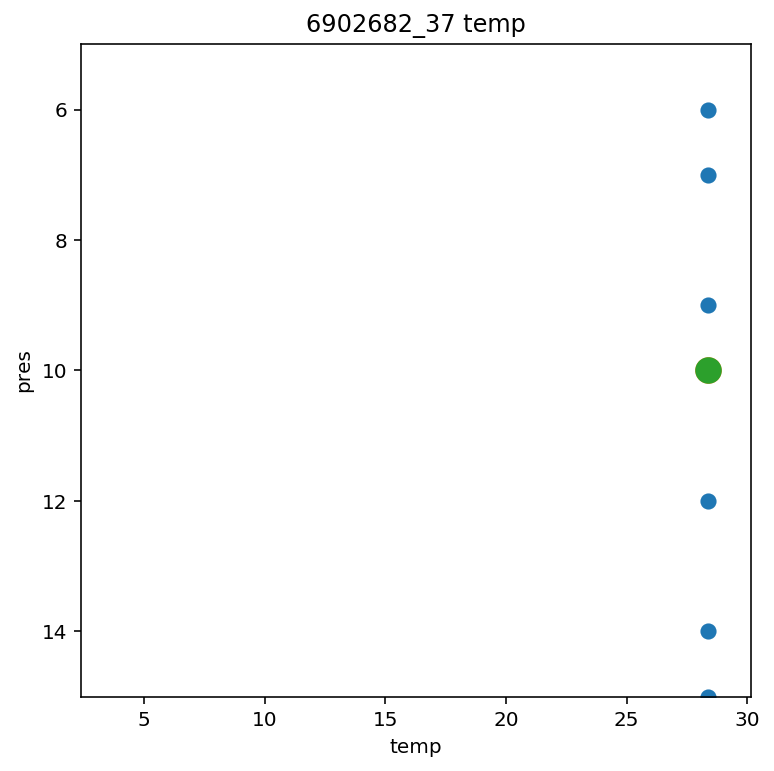

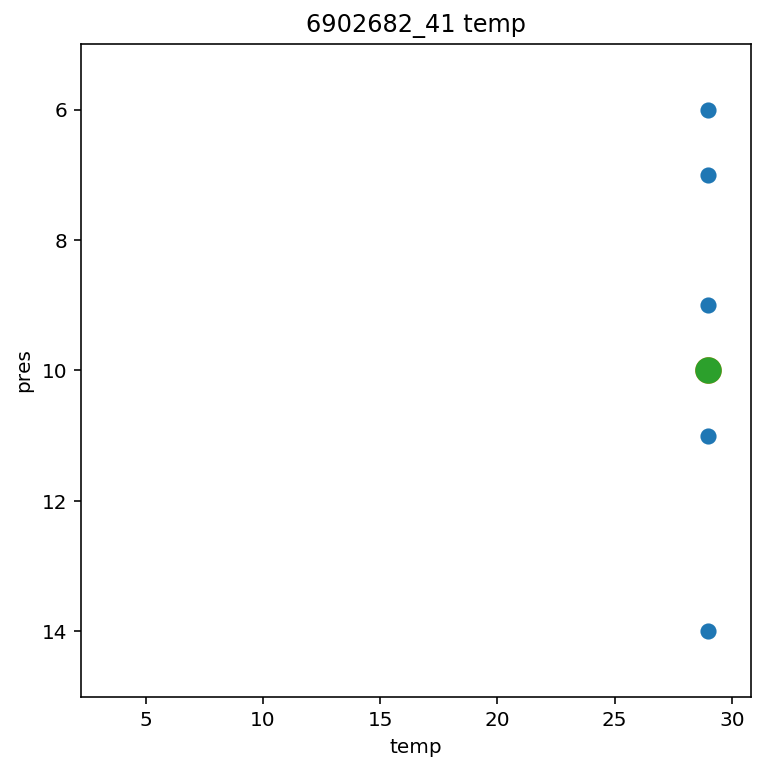

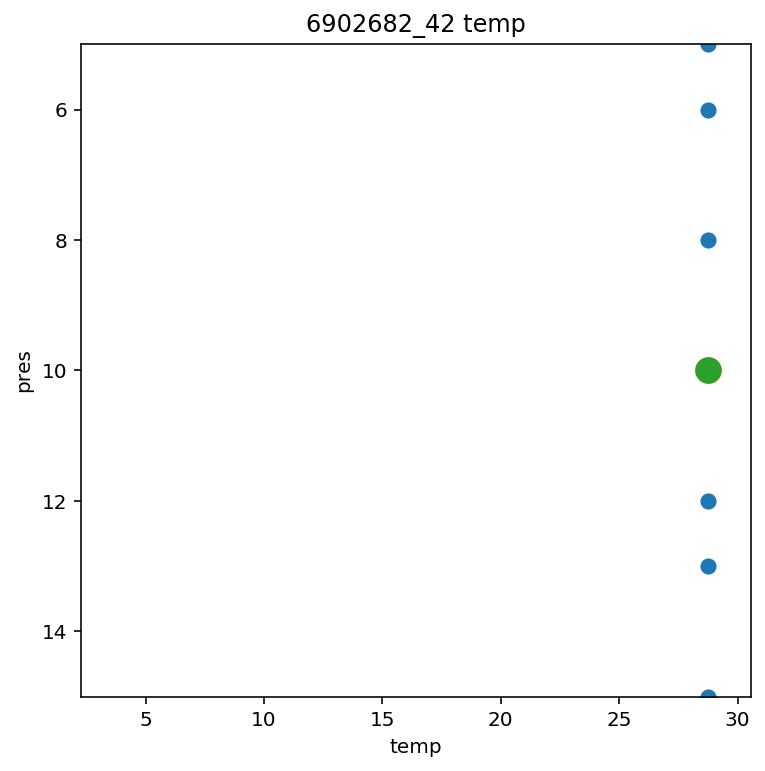

In [29]:
for profile_id, df in selectionDf.groupby('profile_id'):
    #fig.subplots_adjust(hspace=.35, wspace=.35)
    pdf = iDf[iDf['profile_id'] == profile_id]
    iX = pdf[ciCol].iloc[0]
    iY = pdf[xLab].iloc[0]
    
    #create linear interpolation
    f = interp1d(df.pres, df.temp, kind='linear')
    tempLinear = f(pLevel)
    
    if pdf.empty or df.empty:
        continue
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
    if profile_id in {'6901002_100', '6901002_101', '6901740_127'} or np.isnan(iX):
        print('interpolated value is nan')
    ax = vp.plot_scatter(df, profile_id, 'temp', 'pres', axes)
    plt.ylim((15,5))
    ax.scatter(iX, iY, s=150)
    ax.scatter(tempLinear, pLevel, s=150)